In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import scipy

from pathlib import Path

In [30]:
path = Path('C:/Users/user/Desktop/BikeSharingDemand/')
train = pd.read_csv(path/"train.csv")
test = pd.read_csv(path/"test.csv")
submission = pd.read_csv(path/"SampleSubmission.csv")

 datetime - hourly date + timestamp
 
 season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
 
 holiday - whether the day is considered a holiday
 
 workingday - whether the day is neither a weekend nor holiday
 
 weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
 
 temp - temperature in Celsius
 
 atemp - "feels like" temperature in Celsius
 
 humidity - relative humidity
 
 windspeed - wind speed
 
 casual - number of non-registered user rentals initiated
 
 registered - number of registered user rentals initiated
 
 count - number of total rentals

In [11]:
# 사용되는 변수 및 데이터 타입 확인.
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [178]:
#train에는 있는 casual, registered, count가 없음.
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [179]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [180]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [181]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [31]:
#datetime이 object이므로 datetime형태로 바꿔준다.
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [186]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [32]:
# EDA 진행

#1. 시간 단위 별 자전거 수요량 확인(dayofweek는 요일fh 0부터 월요일, 6이 일요일)
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test['hour'] = test['datetime'].dt.hour

In [188]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [189]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


<AxesSubplot:xlabel='year', ylabel='count'>

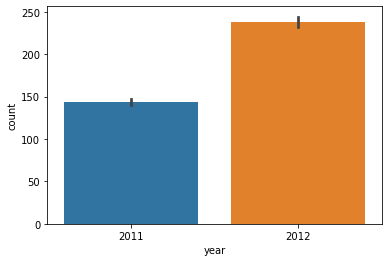

In [190]:
sns.barplot(data = train, x = 'year', y = 'count')

<AxesSubplot:xlabel='month', ylabel='count'>

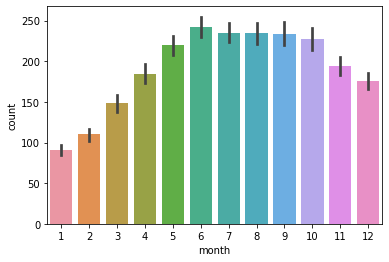

In [191]:
# 계절성 존재하는지 확인 필요.
sns.barplot(data = train, x = 'month', y = 'count')

<AxesSubplot:xlabel='day', ylabel='count'>

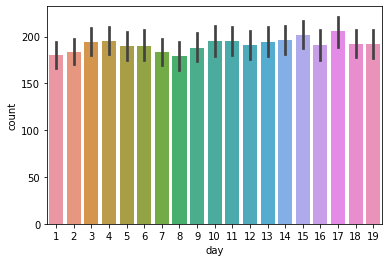

In [192]:
#유의미한 차이는 보이지 않음.
sns.barplot(data = train, x = 'day', y = 'count')

<AxesSubplot:xlabel='season', ylabel='count'>

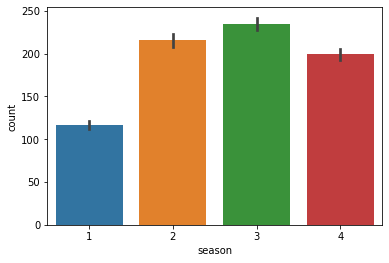

In [193]:
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
sns.barplot(data = train, x = 'season', y = 'count')

In [194]:
#dataset에 주어진 season 변수의 계절 구분 기준.
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


<AxesSubplot:xlabel='hour', ylabel='count'>

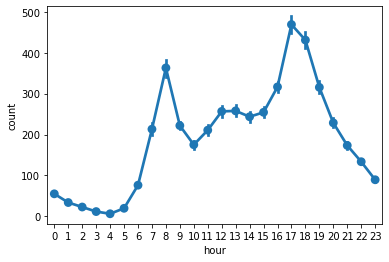

In [195]:
#6~8시 && 16~19시
sns.pointplot(data = train, x = 'hour', y = 'count')

<AxesSubplot:xlabel='hour', ylabel='count'>

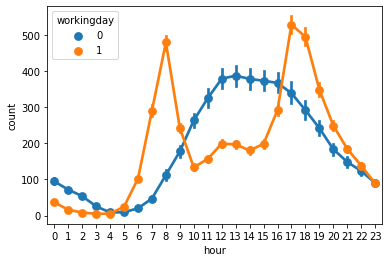

In [196]:
#seaborn에서 카테고리형 데이터를 고려한 그래프를 출력하고 싶으면, hue변수를 추가해준다.
#따라서 시간대별로 holiday == 1일때, holiday =- 0 일때로 출력된다.
#휴일과 평일 이용시간대 상반되는 모습.

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

<AxesSubplot:>

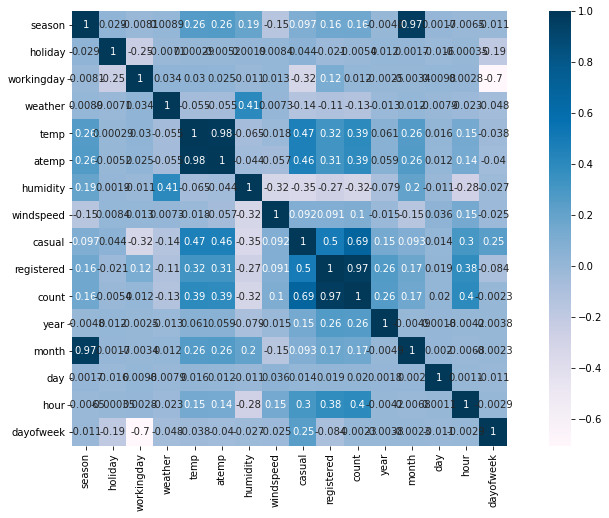

In [197]:
# 다중공선성 확인(VIF 확인하는 법 찾아보기) temp, atemp 상관관계 높은 것 확인.
colormap = plt.cm.PuBu
plt.figure(figsize = (15, 8))
sns.heatmap(train.corr(), linewidths = 0, square = True, annot = True, cmap = colormap)

<AxesSubplot:xlabel='humidity', ylabel='count'>

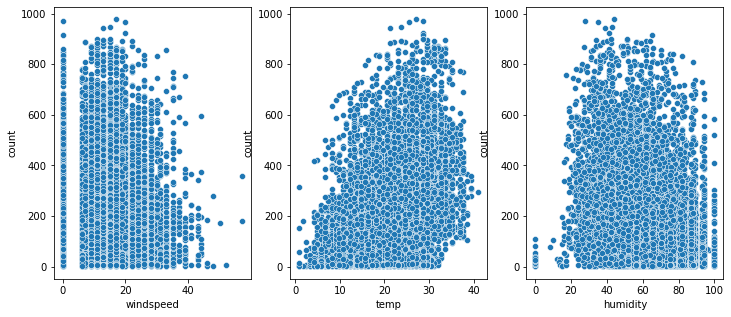

In [198]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)

In [33]:
#outlier 제거 진행
#Q1 - 1.5IQR 미만인 값과 Q3 + 1.5IQR 초과하는 값 제거.
from collections import Counter
#이상치 포함되는 튜플 인덱스 반환해주는 함수.
def detect_outliers(data, n, cols):
    outlier_indices = []
    for col in cols:
        Q1 = np.percentile(data[col], 25) #1/4 지점
        Q3 = np.percentile(data[col], 75) #3/4 지점
        IQR = Q3 - Q1
                
        outlier_list_col = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

In [34]:
Outliers = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [35]:
train.shape

(10886, 17)

In [36]:
#40개의 이상치 포함 데이터 삭제.
train = train.drop(Outliers, axis=0).reset_index(drop=True)
train.shape

(10846, 17)

skewness(왜도): 1.21
kurtosis(첨도): 1.20
평균: 189.39


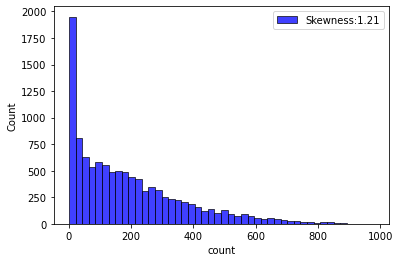

In [37]:
# 0의 빈도가 잦음. -> 정규성 갖추도록 로그 변환
graph = sns.histplot(train['count'], color = 'b', label = 'Skewness:{:.2f}'.format(train['count'].skew()))
                    
graph = graph.legend(loc = 'best')

print('skewness(왜도): %.2f' %train['count'].skew())
print('kurtosis(첨도): %.2f' %train['count'].kurt())
print('평균: %.2f' %train['count'].mean())

skewness(왜도): -0.975198
kurtosis(첨도): 0.247435


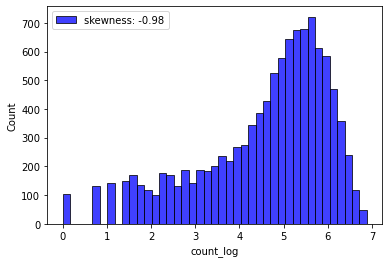

In [38]:
train['count_log'] = train['count'].map(lambda i:np.log(i) if i > 0 else 0)

graph = sns.histplot(train['count_log']
			, color = 'b'
            , label = 'skewness: {:.2f}'.format(train['count_log'].skew())
            )
graph = graph.legend(loc = 'best')

print("skewness(왜도): %f" %train['count_log'].skew())
print("kurtosis(첨도): %f" %train['count_log'].kurt())

#필요없는 count값 없애주기
train.drop('count', axis = 1, inplace = True)

 windspeed가 0인 경우는 null 값을 대체한 것으로 보임(풍속 0인 날은 없으니까)
 
 결측값을 처리하는 방법
 1. 결측값을 변수별 평균으로 채우기
 2. 결측값을 가진 데이터를 삭제하기
 3. 결측값을 0 이나, 아예 다른 값으로 (-999) 대체하기
 4. 결측값을 예측된 값으로 대체하기 (머신러닝을 돌려서)
 
 이 중 4번 방법 선택. RandomForest 알고리즘 사용.

In [39]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]
    
    #풍속이 날씨변수이기 때문에 날씨변수를 활용해서 windspeed를 예측해줄 것
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')
    
    rf = RandomForestClassifier()
    #windspeed가 0이 아닌 컬럼으로 fit 해줌(학습)
    #모델명.fit(학습데이터, 예측할 값)
    rf.fit(windnot0[col], windnot0['windspeed'])
 
 	#windspeed가 0인 부분을 예측
    #모델명.predict(X_test)
    pred_wind0 = rf.predict(X = wind0[col])
    
    #wind0의 windspeed 값을 pred_wind0으로 바꿔주고
    wind0['windspeed'] = pred_wind0
    
    #windnot0과 wind0을 합쳐준다
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
   
    return data

In [40]:
# 랜덤포레스트로 예측된 값으로 풍속 0인 경우 값을 대체함.
train = predict_windspeed(train)
test = predict_windspeed(test)

<ipython-input-39-8e8f765a7619>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')
<ipython-input-39-8e8f765a7619>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0
<ipython-input-39-8e8f765a7619>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [41]:
# 풍속 0인 경우 값 대체된 것 확인.
train[train['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,dayofweek,count_log


<AxesSubplot:xlabel='windspeed', ylabel='count'>

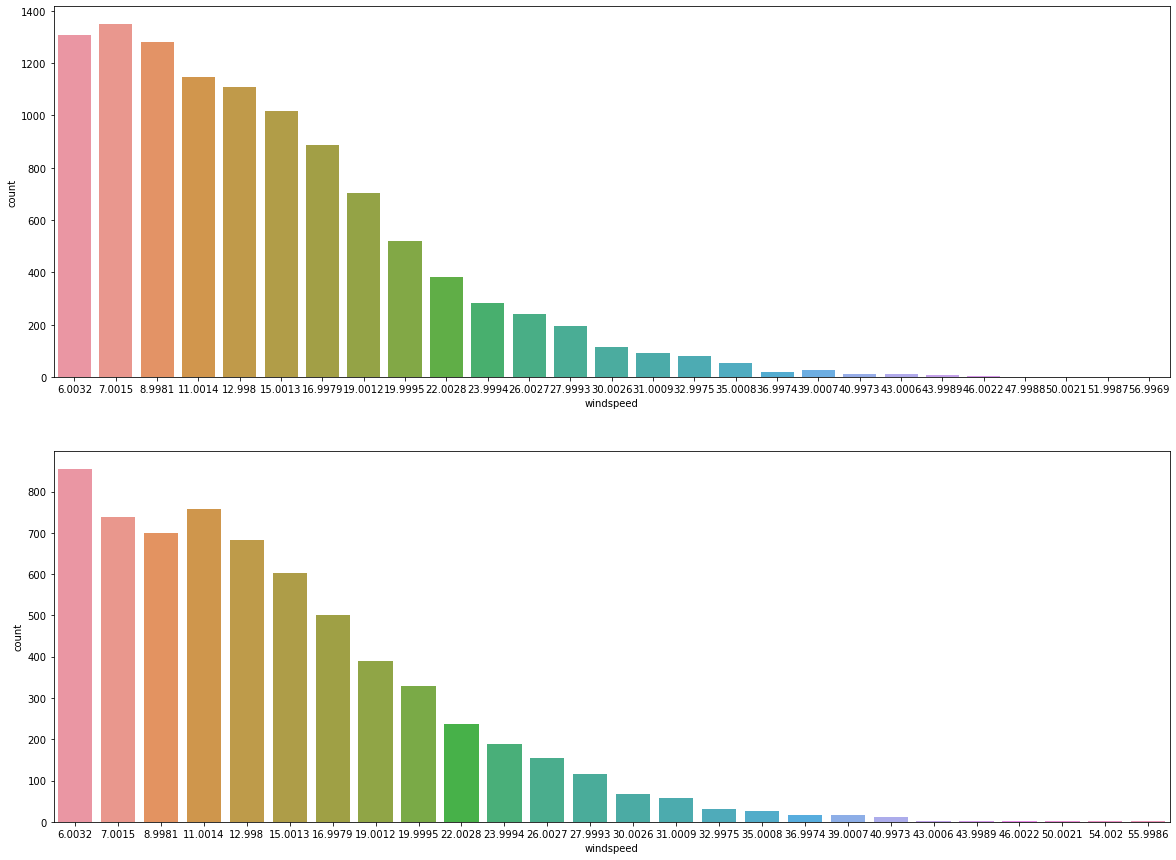

In [208]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)

#갯수를 세야하니 countplot
#바람 많이 불면 대여량 감소.
sns.countplot(data = train, x = 'windspeed', ax = ax1)
sns.countplot(data = test, x = 'windspeed', ax = ax2)

In [42]:
train = pd.get_dummies(train, columns = ['weather'], prefix = ['weather'])
test = pd.get_dummies(test, columns = ['weather'], prefix = ['weather'])

train = pd.get_dummies(train, columns = ['season'], prefix = ['season'])
test = pd.get_dummies(test, columns = ['season'], prefix = ['season'])

train = pd.get_dummies(train, columns = ['holiday'], prefix = ['holiday'])
test = pd.get_dummies(test, columns = ['holiday'], prefix = ['holiday'])

In [210]:
train.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'year', 'month', 'day', 'hour', 'dayofweek',
       'count_log', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1'],
      dtype='object')

In [211]:
test.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'dayofweek', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')

In [43]:
#submission의 형태를 살펴보았을 때, datetime을 기준으로 예측값을 적엇다.
#따라서 test의 datetime은 미래의 submission 을 위해서 따로 저장해두기로 한다.
test_datetime = test['datetime']

train.drop(['datetime', 'workingday', 'atemp', 'registered', 'casual'], axis = 1, inplace = True)
test.drop(['datetime', 'workingday', 'atemp'], axis = 1, inplace = True) 

In [214]:
train.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'count_log', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1'],
      dtype='object')

In [215]:
test.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
#데이터프레임 형태가 아닌 array 형태여야하기때문에 values를 취해줌
x_train = train.drop('count_log', axis = 1).values
target_label = train['count_log'].values
x_test = test.values

# train : val = 0.8 : 0.2 로 split
x_train, x_val, y_train, y_val = train_test_split(x_train, target_label, test_size = 0.2, random_state = 1000)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

1. n_estimators : 트리의 개수(부스팅 시행 횟수). 너무 많으면 과적합 우려.

2. learning rate : 모델 만들어갈 때마다 오차 보정하는 정도.

3. criterion : 손실함수 기준(friedman_mse, squared_erro, mse, mae)

4. min_samples_leaf : 트리 생성 시 리프 노드에 들어가는 최소 샘플 개수. 평활(smoothing) 목적으로 사용.

In [61]:
# 학습곡선 그려보고 최적 학습량 찾을것.
regressor = GradientBoostingRegressor(n_estimators = 2000
                                    , learning_rate = 0.05
                                    , max_depth = 5
                                    , min_samples_leaf = 15
                                    , min_samples_split = 10
                                    , random_state = 42)
#model.fit(x, y)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

In [62]:
score_train = regressor.score(x_train, y_train)
score_val = regressor.score(x_val, y_val)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.992877
validation score: 0.955442


In [63]:
pred = regressor.predict(x_test)

In [64]:
sample = pd.read_csv(path/"SampleSubmission.csv")
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [65]:
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count_log'] = pred

In [66]:
# log에 다시 exp 취해 원래 값으로 돌려줌.
submission['count'] = np.exp(submission['count_log'])
    
submission.drop('count_log', axis = 1, inplace = True)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,17.241352
1,2011-01-20 03:00:00,1.853402
2,2011-01-20 04:00:00,2.057208
3,2011-01-20 05:00:00,4.399117
4,2011-01-20 06:00:00,33.089179


In [67]:
submission.to_csv(path/"Bike.csv", index = False)